In [ ]:
%pip install kaggle

**Importing the Dependencies**

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c cifar-10

 99% 705M/715M [00:08<00:00, 134MB/s]
100% 715M/715M [00:08<00:00, 83.7MB/s]


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
from zipfile import ZipFile

dataset = "/content/cifar-10.zip"

with ZipFile(dataset, "r") as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [6]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
%pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 24.4 MB/s eta 0:00:00


In [8]:
import py7zr

archive = py7zr.SevenZipFile("/content/train.7z", mode="r")
archive.extractall()
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


**Importing the Dependencies**

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir("/content/train")

In [ ]:
type(filenames)

list

In [ ]:
len(filenames)

50000

In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['25821.png', '46221.png', '21445.png', '23889.png', '6809.png']
['4209.png', '11082.png', '7521.png', '37428.png', '37084.png']


**Processing the labels**

In [ ]:
labels_df = pd.read_csv("/content/trainLabels.csv")

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df[labels_df['id'] == 25821]

,id,label
25820,25821,airplane


In [ ]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [ ]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
labels_df["label"].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [ ]:
labels_dictionary = {
    "airplane": 0,
    "automobile": 1,
    "bird": 2,
    "cat": 3,
    "deer": 4,
    "dog": 5,
    "frog": 6,
    "horse": 7,
    "ship": 8,
    "truck": 9,
}

In [ ]:
labels = [labels_dictionary[i] for i in labels_df["label"]]

In [ ]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


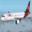

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/train/25821.png")
cv2_imshow(img)

In [ ]:
id_list = list(labels_df["id"])

print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Processing the images**

In [ ]:
train_data_folder = "/content/train/"

data = []

In [ ]:
for id in id_list:
  image = Image.open(train_data_folder + str(id) + ".png")
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
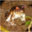

In [ ]:
data[0]

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


**Scaling the data**

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

print(X_train_scaled)

[[[[0.81960784 0.82352941 0.79607843]
   [0.83529412 0.83921569 0.81960784]
   [0.85490196 0.85882353 0.84313725]
   ...
   [0.49803922 0.29019608 0.15294118]
   [0.47843137 0.26666667 0.1372549 ]
   [0.45490196 0.24705882 0.1254902 ]]

  [[0.82352941 0.82352941 0.79215686]
   [0.83529412 0.83921569 0.81176471]
   [0.85490196 0.8627451  0.83921569]
   ...
   [0.48627451 0.2745098  0.1372549 ]
   [0.4745098  0.2627451  0.12941176]
   [0.48235294 0.27058824 0.14117647]]

  [[0.80784314 0.80392157 0.76470588]
   [0.81960784 0.81960784 0.79215686]
   [0.83529412 0.84313725 0.81960784]
   ...
   [0.48627451 0.2745098  0.14509804]
   [0.51372549 0.30196078 0.16470588]
   [0.51372549 0.30588235 0.16078431]]

  ...

  [[0.49803922 0.42352941 0.38039216]
   [0.54117647 0.47843137 0.43137255]
   [0.55294118 0.49803922 0.4627451 ]
   ...
   [0.61960784 0.58431373 0.5254902 ]
   [0.63137255 0.61176471 0.59215686]
   [0.53333333 0.5372549  0.58039216]]

  [[0.56862745 0.50980392 0.46666667]
   [0.5

**Building the Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 10

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,322 (770.79 KB)

 Trainable params: 197,322 (770.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2561 - loss: 2.0438 - val_accuracy: 0.3485 - val_loss: 1.8107
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3515 - loss: 1.8288 - val_accuracy: 0.3207 - val_loss: 1.8988
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3669 - loss: 1.7791 - val_accuracy: 0.3577 - val_loss: 1.7822
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3772 - loss: 1.7531 - val_accuracy: 0.3860 - val_loss: 1.7107
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3868 - loss: 1.7226 - val_accuracy: 0.3830 - val_loss: 1.7022
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3892 - loss: 1.7092 - val_accuracy: 0.3970 - val_loss: 1.6952
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3921 - loss: 1.7026 - val_accuracy: 0.3868 - val_loss: 1.7004
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4006 - loss: 1.6760 - 

**ResNet50**

In [ ]:
from keras import Sequential, models, layers
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.models import load_model, Model
from keras.applications.resnet50 import ResNet50
from keras import optimizers

In [ ]:
convolutional_base = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(256, 256, 3)
)

convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model = models.Sequential()

model.add(layers.UpSampling2D((2, 2)))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.UpSampling2D((2, 2)))

model.add(convolutional_base)

model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(num_of_classes, activation='softmax'))

In [ ]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 437s 344ms/step - accuracy: 0.3314 - loss: 2.0149 - val_accuracy: 0.7490 - val_loss: 0.8506
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 377s 335ms/step - accuracy: 0.6637 - loss: 1.0691 - val_accuracy: 0.8940 - val_loss: 0.4425
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 390s 343ms/step - accuracy: 0.7883 - loss: 0.7532 - val_accuracy: 0.9197 - val_loss: 0.3303
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 343ms/step - accuracy: 0.8606 - loss: 0.5710 - val_accuracy: 0.9260 - val_loss: 0.2718
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 343ms/step - accuracy: 0.9001 - loss: 0.4446 - val_accuracy: 0.9362 - val_loss: 0.2436
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 343ms/step - accuracy: 0.9277 - loss: 0.3570 - val_accuracy: 0.9340 - val_loss: 0.2413
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 433s 335ms/step - accuracy: 0.9485 - loss: 0.2871 - val_accuracy: 0.9375 - val_loss: 0.2327
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 391s 343ms/step - ac

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test accuracy: ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 107ms/step - accuracy: 0.9339 - loss: 0.2400
Test accuracy:  0.9347000122070312


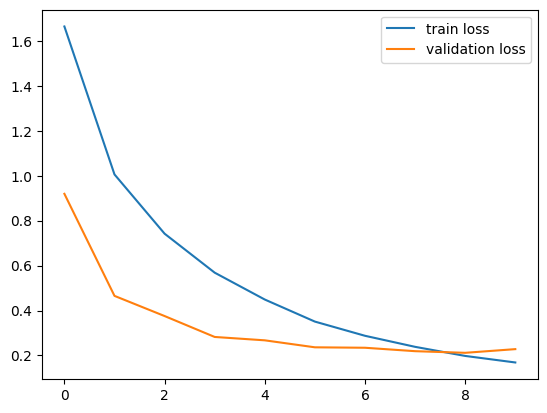

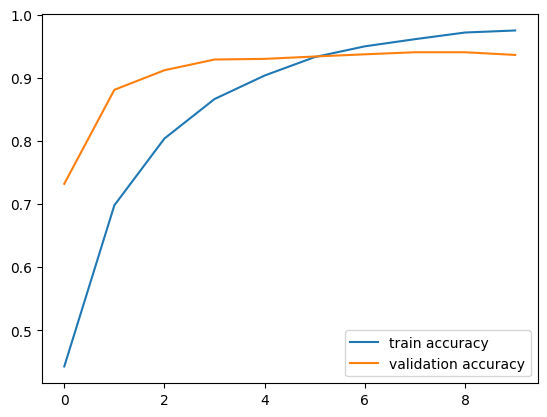

In [ ]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()